In [1]:
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
init_notebook_mode(connected=True) #required to run plotly in offline mode

In [2]:
data = pd.read_csv("MicrochipData.csv")
data = shuffle(data)
data.head()

,test1,test2,result
113,-0.72062,0.53874,0
66,0.82316,0.27558,0
82,-0.40956,-0.41155,0
65,0.92684,0.36330,0
50,0.13767,0.57529,1


In [3]:
results = [1 , 0]
fig = {
    'data': [
        {
            'x': data.loc[(data['result']==result), 'test1'] ,
            'y': data.loc[(data['result']==result),'test2'],
            'name': result, 'mode': 'markers',
        } for result in results
    ],
    'layout': {
        'title': 'test1 vs test2',
        'xaxis': {'title': 'test2'},
        'yaxis': {'title': "test1"}
    }
}
py.offline.iplot(fig)

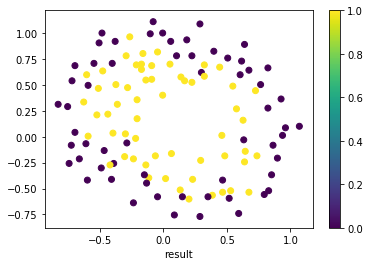

In [4]:
plt.xlabel(data.columns[2])
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=data.iloc[:,2])
plt.colorbar()

In [5]:
X = data.iloc[: , : 2]
Y = data.iloc[: , 2:]
Xadd1 = X["test1"]**2
Xadd2 = X["test2"]**2
X.insert(2 , "t1" , Xadd1)
X.insert(3 , "t2" , Xadd2)
x_train = X.iloc[:int(X.shape[0] * .7) , :]
y_train = Y.iloc[:int(Y.shape[0] * .7) , :]
x_test = X.iloc[int(X.shape[0] * .7): , :]
y_test = Y.iloc[int(Y.shape[0] * .7): , :]
x_axis = []
y_axis = []
lambdda = 0
intercept = np.ones((x_train.shape[0], 1))
x_train = np.concatenate((intercept, x_train), axis=1)
intercept = np.ones((x_test.shape[0], 1))
x_test = np.concatenate((intercept, x_test), axis=1)
theta = np.zeros((x_train.shape[1] , 1))

In [6]:
def gradient_descent(X, h, y):
    return (np.dot(X.T, (h - y)))/y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return ((1 - (learning_rate* lambdda)/y_train.shape[0])*weight - learning_rate*(gradient))
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

In [7]:
epochs = 100000
for i in range(epochs):
    h = sigmoid(x_train, theta)
    loss = (h - y_train)**2
    x_axis.append(i)
    y_axis.append(np.average(loss))
    gradient = gradient_descent(x_train, h, y_train)
    theta = update_weight_loss(theta, 0.01, gradient)    

In [8]:
result = sigmoid(x_test , theta)
c = 0
y_test = y_test.values

In [9]:
for i in range(x_test.shape[0]):
    if(round(float(result[i])) == float(y_test[i])):
        c += 1

In [10]:
accuracy = c/y_test.shape[0]
print("accuracy:" , accuracy * 100) 

accuracy: 80.55555555555556


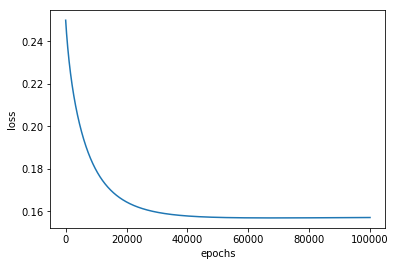

In [11]:
plt.plot(x_axis , y_axis)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [24]:
theta
w = theta.flatten()
xx1 = []
yy1 = []
xx2 = []
yy2 = []

In [25]:
xx = np.linspace(-1 , 1 , 1000)
def calc(x):
    D = w[2]**2 - 4 * w[4] * (w[0] + w[1]*x + w[3]*(x**2))
    if D >= 0:
        s1 = (-w[2] + np.sqrt(D))/(2*w[4])
        s2 = (-w[2] - np.sqrt(D))/(2*w[4])
        xx1.append(x)
        yy1.append(s1)
        xx2.append(x)
        yy2.append(s2)
for i in xx:
    calc(i)

<IPython.core.display.Javascript object>


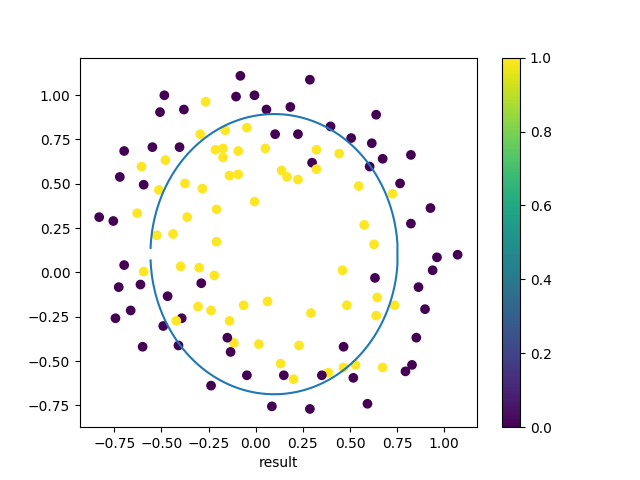

In [26]:
%matplotlib notebook
plt.xlabel(data.columns[2])
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=Y.iloc[:,0])
plt.colorbar()
xx1 = np.append(xx1 , np.flip(xx2))
yy1 = np.append(yy1 , np.flip(yy2))

plt.plot(xx1 , yy1)

In [15]:
theta

array([[ 3.0447405 ],
       [ 1.43925748],
       [ 1.04902261],
       [-7.36669153],
       [-5.07638338]])

In [16]:
x_train[0]

array([ 1.        , -0.72062   ,  0.53874   ,  0.51929318,  0.29024079])

In [17]:
np.sqrt(4)

2.0

In [18]:
x = -0.5
D = w[2]**2 - 4 * w[4] * (w[0] + w[1]*x * w[3]*(x**2))
if D >= 0:
    s1 = (-w[2] + np.sqrt(D))/(2*w[4])
    s2 = (-w[2] - np.sqrt(D))/(2*w[4])

In [19]:
s1

-0.8302376233663024

In [20]:
s2

1.0368852572229126